## Importing Libraries 

In [2]:
import pandas as pd
import numpy as np

import os
import sys
import math
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Importing Path of the datasets with respect to the present working directory

In [3]:
Ravdess = "Dataset/Ravdees/"
Crema = "Dataset/Crema/AudioWAV/"
Tess="Dataset/Tess/TESS Toronto emotional speech set data/"

# Importing RAVDEES Dataset

In [4]:
replace={}
for i in range(1,25):
    if(i%2==0):
        replace[i]='female'
    else:
        replace[i]='male'
ravdess_directory_list = os.listdir(Ravdess)

# list all the directories 


file_emotion = []
file_path = []
file_gender=[]

for dir in ravdess_directory_list:      #iterate through all the directories one directory = one voice actor
                                        # as their are 20 different actors in our previous directory we need to extract files for each actor.
    

    actor = os.listdir(Ravdess + dir)
                                        # List the contents (wav files) of each directory
    for file in actor:
        part = file.split('.')[0]       # split the file into two parts 01-01-02-04(p1).wav(p2)
        part = part.split('-')
        if part[2]!='01':
            file_gender.append(int(part[6]))
                                        # third part in each file represents the emotion associated to that file 02 in above line
            file_emotion.append(int(part[2]))                
            file_path.append(Ravdess + dir + '/' + file)
        
        #creating two lists one with the emotions and another with corresponding location
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
gender_df=  pd.DataFrame(file_gender, columns=['gender'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df,gender_df,path_df], axis=1)    #concatinate both the dataframes so that corresponding file path comes next to the emotion
                                                         # 0  01   path1
                                                         #1   02   path2
                                                         # 2  03   path3
                                                         #1   04   path4
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.gender.replace(replace, inplace=True)
Ravdess_df.head()

#replace 2 nd column by actual emotions

,Emotions,gender,Path
0,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-01-01-01.wav
1,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-01-02-01.wav
2,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-02-01-01.wav
3,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-02-02-01.wav
4,calm,male,Dataset/Ravdees/Actor_01/03-01-02-02-01-01-01.wav


# Importing CREMA D Dataset

In [5]:
crema_directory_list = os.listdir(Crema)
male = [1001,1005,1011,1014,1015,1016,1017,1019,1022,1023,1024,1026,1027,1031,1032,1033,1034,1035,1036,1038,1039,1041,1042,1044,1045,1048,1050,1051,1057,1059,1062,1064,1065,1066,1067,1068,1069,1070,1071,1077,1080,1081,1083,1085,1086,1087,1088,1090]
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1025,1028,1029,1030,1037,1040,1043,1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
file_emotion = []
file_path = []
file_gender=[]
for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')          # 3rd part of each file contains emotion, create trwo lists with
                                  # emotion and  corrseponding file path
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
    id = int(part[0])
    if id in male:
        file_gender.append('male')
    else:
        file_gender.append('female')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
gender_df=  pd.DataFrame(file_gender, columns=['gender'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df,gender_df, path_df], axis=1)
Crema_df.head()

,Emotions,gender,Path
0,angry,male,Dataset/Crema/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,male,Dataset/Crema/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,male,Dataset/Crema/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,male,Dataset/Crema/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,male,Dataset/Crema/AudioWAV/1001_DFA_NEU_XX.wav


# Importing TESS Dataset

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_gender=[]
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)       
    for file in directories:                   #OAF_back_neutral.wav
        part = file.split('_')[-1]             # OAF_back_angry.wav     OAF[0]  back[1]  angry [2] or [-1]
        part = part.split('.')[0]              #OAF_back_ps.wav
        if part=='ps':
            file_emotion.append('surprise')
            file_gender.append('female')
        else:                                 #since only surprise emotion is given as ps all other emotions are given correctly
            file_emotion.append(part)
            file_gender.append('female')
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
gender_df=  pd.DataFrame(file_gender, columns=['gender'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df,gender_df,path_df], axis=1)
Tess_df.head()


,Emotions,gender,Path
0,angry,female,Dataset/Tess/TESS Toronto emotional speech set...
1,angry,female,Dataset/Tess/TESS Toronto emotional speech set...
2,angry,female,Dataset/Tess/TESS Toronto emotional speech set...
3,angry,female,Dataset/Tess/TESS Toronto emotional speech set...
4,angry,female,Dataset/Tess/TESS Toronto emotional speech set...


## IMPORTING DATASET ACCORDING TO OUR REQUIREMENT

In [7]:
data_path = pd.concat([Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,gender,Path
0,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-01-01-01.wav
1,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-01-02-01.wav
2,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-02-01-01.wav
3,calm,male,Dataset/Ravdees/Actor_01/03-01-02-01-02-02-01.wav
4,calm,male,Dataset/Ravdees/Actor_01/03-01-02-02-01-01-01.wav


# Counting all Emotions and Dataset of Corresponding Dataset

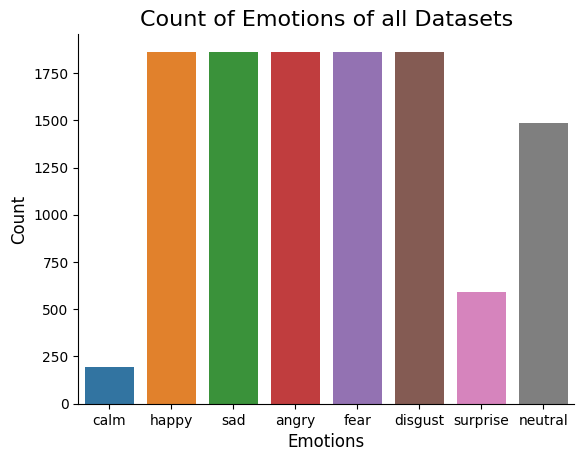

Emotions    11586
gender      11586
Path        11586
dtype: int64

In [8]:
plt.title('Count of Emotions of all Datasets', size=16)
data = pd.concat([Ravdess_df,Tess_df,Crema_df], axis = 0)
sns.countplot(x="Emotions",data=data)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
data.count()

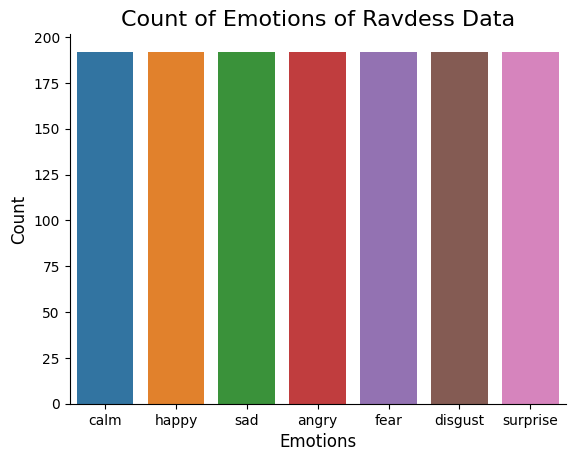

Emotions    1344
gender      1344
Path        1344
dtype: int64

In [9]:
plt.title('Count of Emotions of Ravdess Data', size=16)
sns.countplot(x="Emotions",data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
data_path.count()

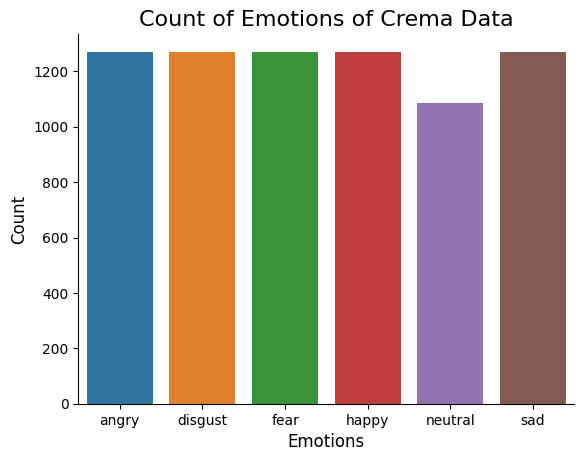

Emotions    7442
gender      7442
Path        7442
dtype: int64

In [10]:
Data_Crema = pd.concat([Crema_df], axis = 0)
plt.title('Count of Emotions of Crema Data', size=16)
sns.countplot(x="Emotions",data=Data_Crema)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
Data_Crema.count()

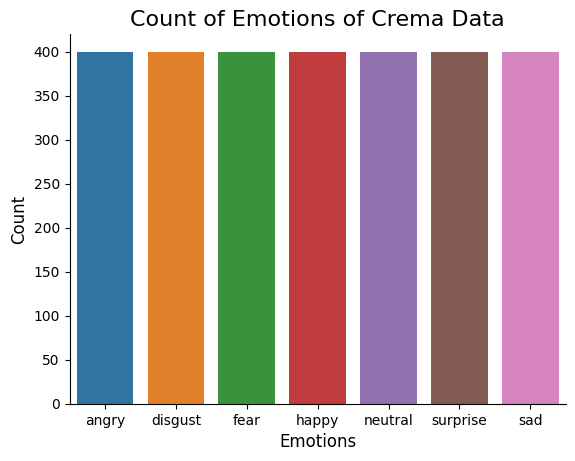

Emotions    2800
gender      2800
Path        2800
dtype: int64

In [11]:
Data_Tess = pd.concat([Tess_df], axis = 0)
plt.title('Count of Emotions of Crema Data', size=16)
sns.countplot(x="Emotions",data=Data_Tess)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
Data_Tess.count()

# Counting The Genders(Male and Female) 

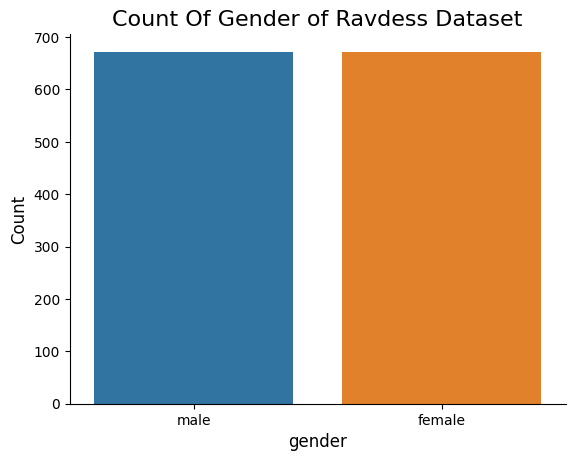

male: 672
female: 672


In [12]:
plt.title('Count Of Gender of Ravdess Dataset', size=16)
sns.countplot(x="gender",data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
male=0;
female=0
for i in Ravdess_df.gender:
    if i=='male':
        male+=1
    else:
        female+=1
print(f'male: {male}')        
print(f'female: {female}')  

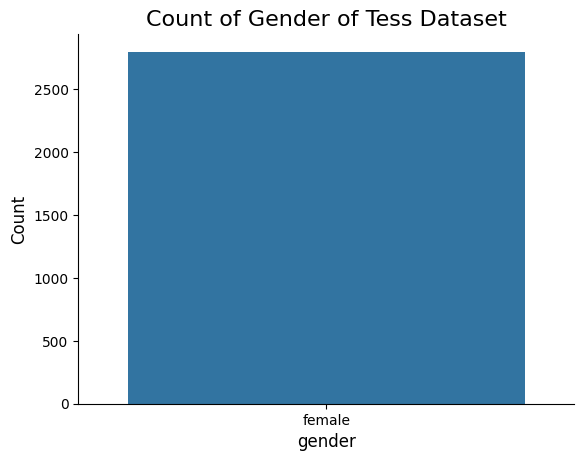

male: 0
female: 2800


In [13]:
Data_Tess = pd.concat([Tess_df], axis = 0)
plt.title('Count of Gender of Tess Dataset', size=16)
sns.countplot(x="gender",data=Data_Tess)
plt.ylabel('Count', size=12)
plt.xlabel('gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
Data_Tess.count()
male1=0
female1=0
for i in Tess_df .gender:
    if i=='male':
        male1+=1
    else:
        female1+=1
print(f'male: {male1}')        
print(f'female: {female1}') 

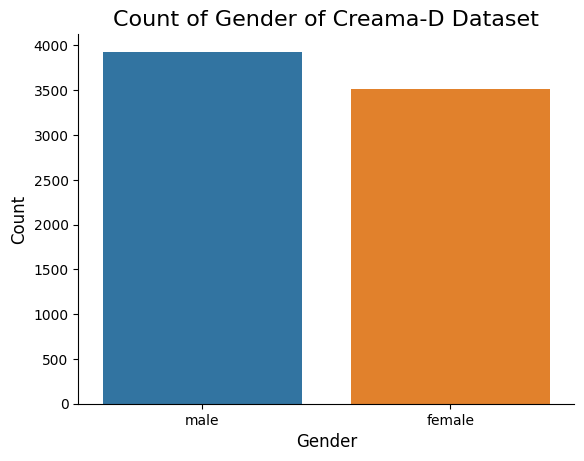

male: 3930
female: 3512


In [14]:
Data_Crema = pd.concat([Crema_df], axis = 0)
plt.title('Count of Gender of Creama-D Dataset', size=16)
sns.countplot(x="gender",data=Data_Crema)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
Data_Tess.count()
male2=0
female2=0
for i in Crema_df .gender:
    if i=='male':
        male2+=1
    else:
        female2+=1
print(f'male: {male2}')        
print(f'female: {female2}')

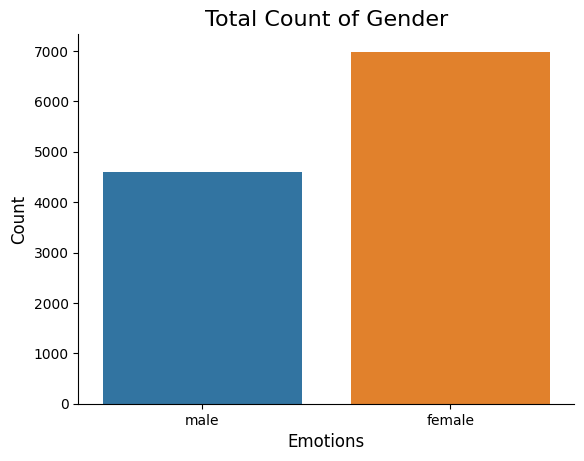

Total male: 4602
Total Female: 6984


In [15]:
Gender_Total= pd.concat([Ravdess_df,Tess_df,Crema_df], axis = 0)
plt.title('Total Count of Gender', size=16)
sns.countplot(x="gender",data=Gender_Total)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
print(f'Total male: {male+male1+male2}')
print(f'Total Female: {female+female1+female2}')

# Count of Different Emotions

In [16]:
Happy=0
Sad=0
fear=0
disgust=0
angry=0
surprise=0
neutral=0
calm=0
for i in data_path.Emotions:
    if i=='calm':
        calm+=1
    if i=='neutral':
        neutral+=1
    if i=='surprise':
        surprise+=1
    if i=='fear':
        fear+=1        
    if i=='sad':
        Sad+=1        
    if i=='happy':
        Happy+=1   
    if i=='angry':
        angry+=1  
    if i=='disgust':
        disgust+=1         
print(Happy,Sad,fear,disgust,angry,neutral,calm,surprise)      

192 192 192 192 192 0 192 192


In [17]:
Happy=0
Sad=0
fear=0
disgust=0
angry=0
surprise=0
neutral=0
calm=0
for i in Data_Crema.Emotions:
    if i=='calm':
        calm+=1
    if i=='neutral':
        neutral+=1
    if i=='surprise':
        surprise+=1
    if i=='fear':
        fear+=1        
    if i=='sad':
        Sad+=1        
    if i=='happy':
        Happy+=1   
    if i=='angry':
        angry+=1  
    if i=='disgust':
        disgust+=1         
print(Happy,Sad,fear,disgust,angry,neutral,calm,surprise) 

1271 1271 1271 1271 1271 1087 0 0


In [18]:
Happy=0
Sad=0
fear=0
disgust=0
angry=0
surprise=0
neutral=0
calm=0
for i in Data_Tess.Emotions:
    if i=='calm':
        calm+=1
    if i=='neutral':
        neutral+=1
    if i=='surprise':
        surprise+=1
    if i=='fear':
        fear+=1        
    if i=='sad':
        Sad+=1        
    if i=='happy':
        Happy+=1   
    if i=='angry':
        angry+=1  
    if i=='disgust':
        disgust+=1         
print(Happy,Sad,fear,disgust,angry,neutral,calm,surprise) 

400 400 400 400 400 400 0 400


In [19]:
Happy=0
Sad=0
fear=0
disgust=0
angry=0
surprise=0
neutral=0
calm=0
for i in Gender_Total.Emotions:
    if i=='calm':
        calm+=1
    if i=='neutral':
        neutral+=1
    if i=='surprise':
        surprise+=1
    if i=='fear':
        fear+=1        
    if i=='sad':
        Sad+=1        
    if i=='happy':
        Happy+=1   
    if i=='angry':
        angry+=1  
    if i=='disgust':
        disgust+=1         
print(Happy,Sad,fear,disgust,angry,neutral,calm,surprise) 

1863 1863 1863 1863 1863 1487 192 592


### Waveplots - Waveplots let us know the loudness of the audio at a given time.
### Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [20]:
def create_waveplot(data, sr, e):                 ##function to create waveplot
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)      #format.(e) replaces {} with emotion 
    librosa.display.waveshow(data, sr=sr)                                   #Visualize a waveform in the time domain.
    plt.show()

def create_spectrogram(data, sr, e):              #function to create spectrogram
   
    X = librosa.stft(data)                        # stft function converts the data into short term fourier transform
    Xdb = librosa.amplitude_to_db(abs(X))        #convert amplitude into dB
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)    
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

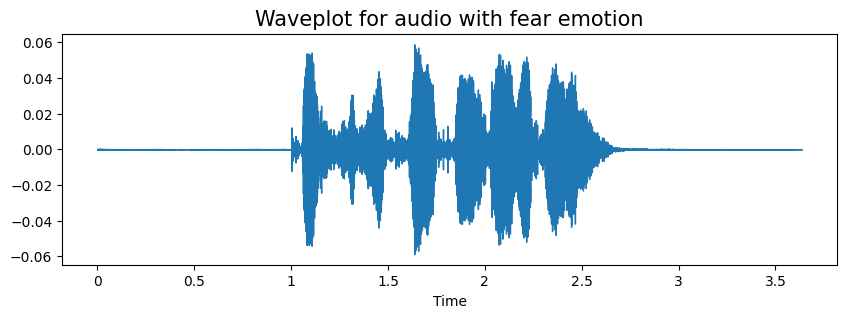

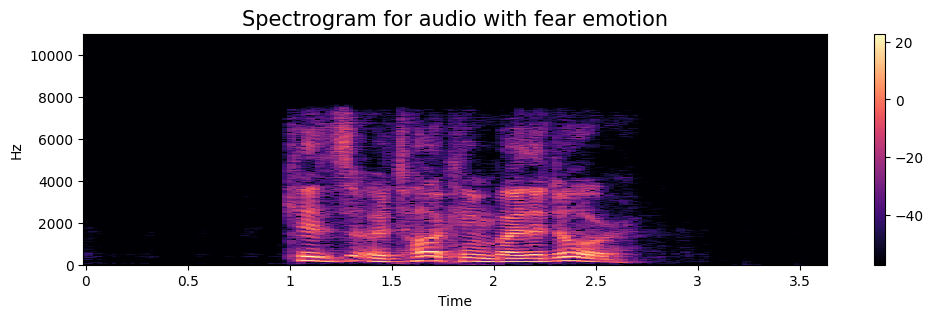

In [21]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]   # convert the path in data path where the 
                                                                  # emotion column has fear to to numpy array
                                                                  #and select a single file file at index [1] to plot
                                                                  #waveplot and spectrogram
     
    
data, sampling_rate = librosa.load(path)    #librosa.load(path) converts data in given path to flosting point data
                                            # if librosa.load(path,sr=none) is used original sampling frequency is preserved 
                                            #else default sampling frequency of 22050Hz is used
    
create_waveplot(data, sampling_rate, emotion)                     #call waveplot and spectrogram functions
create_spectrogram(data, sampling_rate, emotion)    
Audio(path)                                                       #load audio file in given path

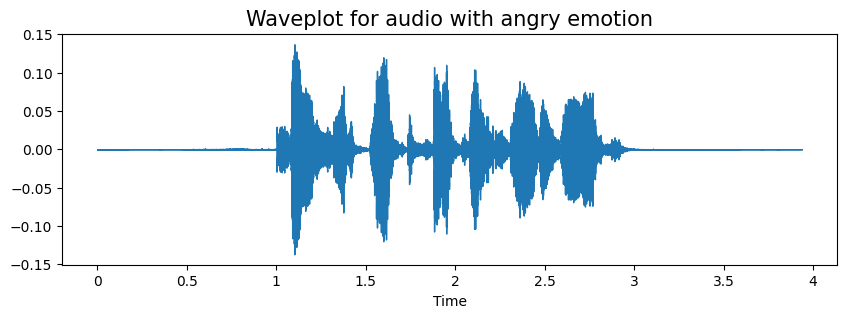

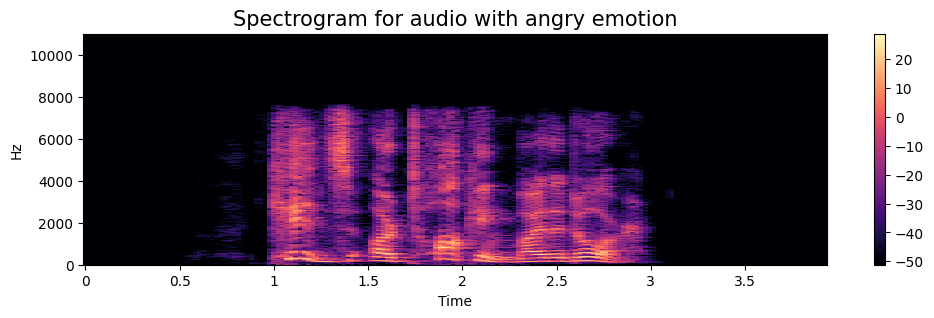

In [22]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)      
create_spectrogram(data, sampling_rate, emotion)
Audio(path)                                        

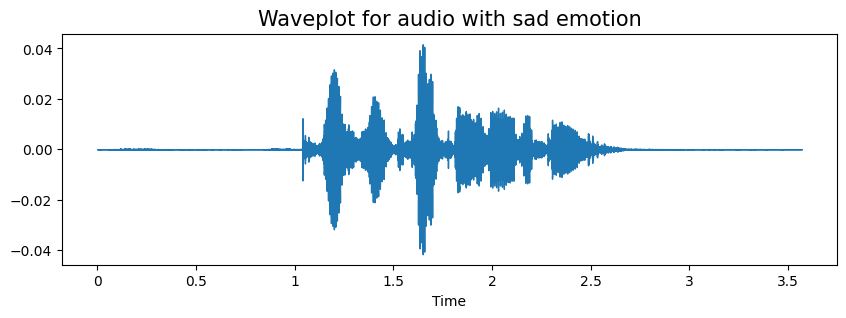

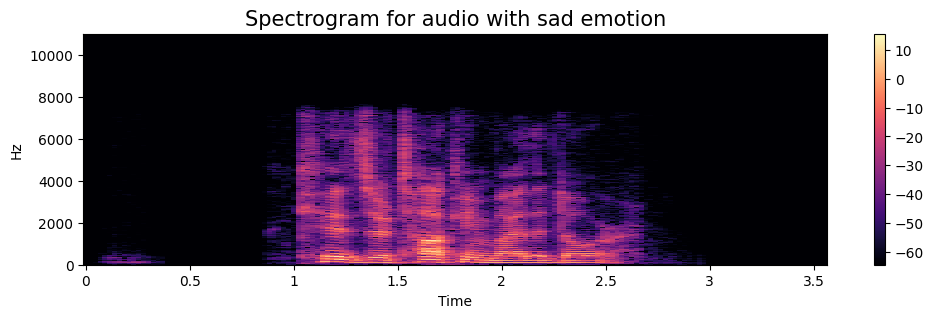

In [23]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

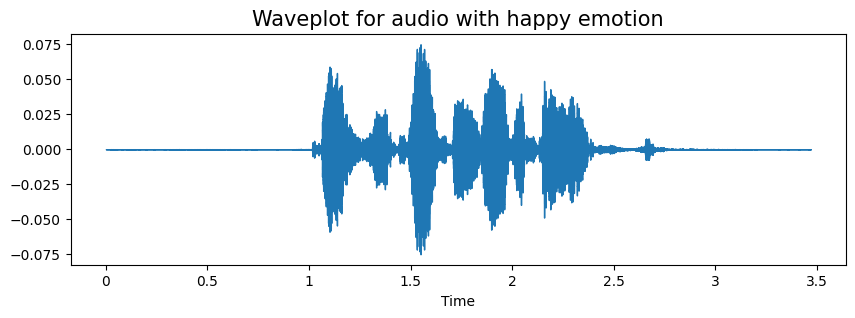

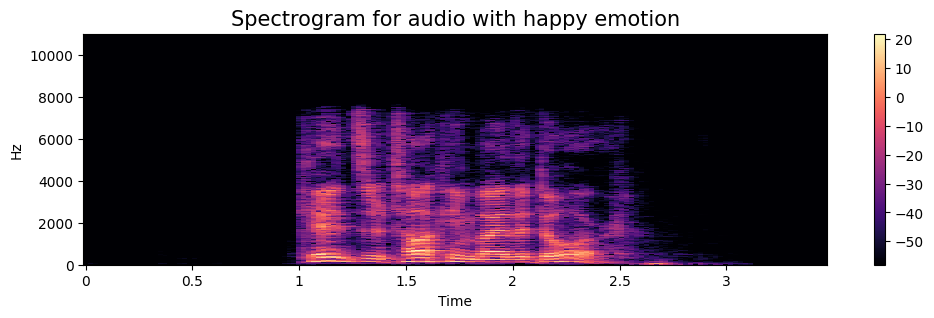

In [24]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data augmentaion
### Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
### To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
### The objective is to make our model invariant to those perturbations and enhace its ability to generalize.

In [25]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

#given a signal, noise (audio) and desired SNR, this gives the noise (scaled version of noise input) that gives the desired SNR
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)            #creating noise signal using given data signal
    data = data + noise_amp*np.random.normal(size=data.shape[0])  # add given signal and noise signal                                                              #resultant signal
    return data
#***convert complex np array to polar arrays (2 apprays; abs and angle)
def gaussian_noise(path):
    signal_file= path
    signal, sr = librosa.load(signal_file)
    signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
    noise=get_white_noise(signal,SNR=30)                                  #SNR is set to 40
    data = signal + noise
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)              # strecth the signal --> speed = 0.8 times original speed


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)  #choose a random shift range
    return np.roll(data, shift_range)                            #The numpy.roll() function rolls array elements along 
                                                                 #the specified axis. Basically what happens is that
                                                                 #elements of the input array are being shifted. 

        
        
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

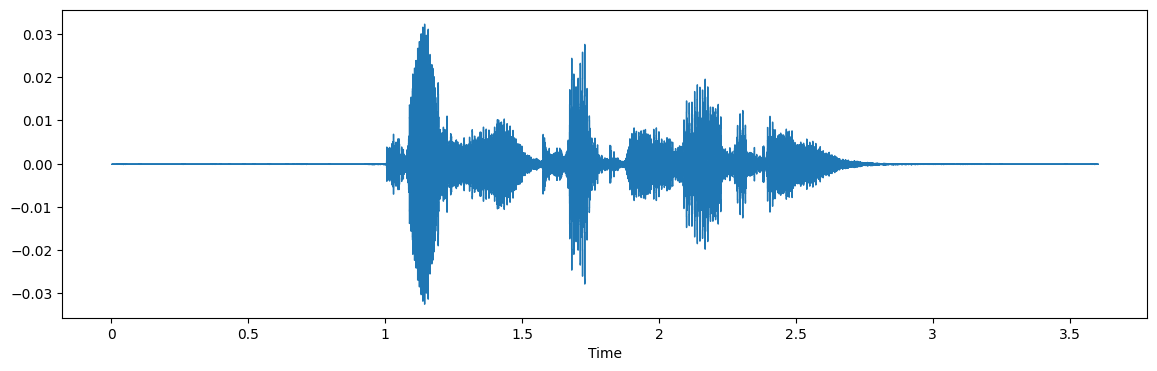

In [26]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)    #waveplot of single audio file in the specified path
Audio(path)

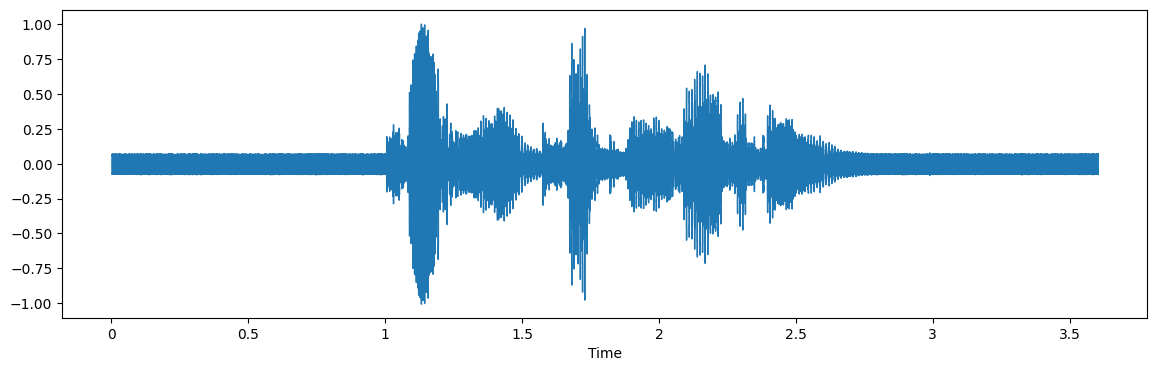

In [27]:
x = gaussian_noise(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)     # waveplot with noise added
Audio(x, rate=sample_rate)

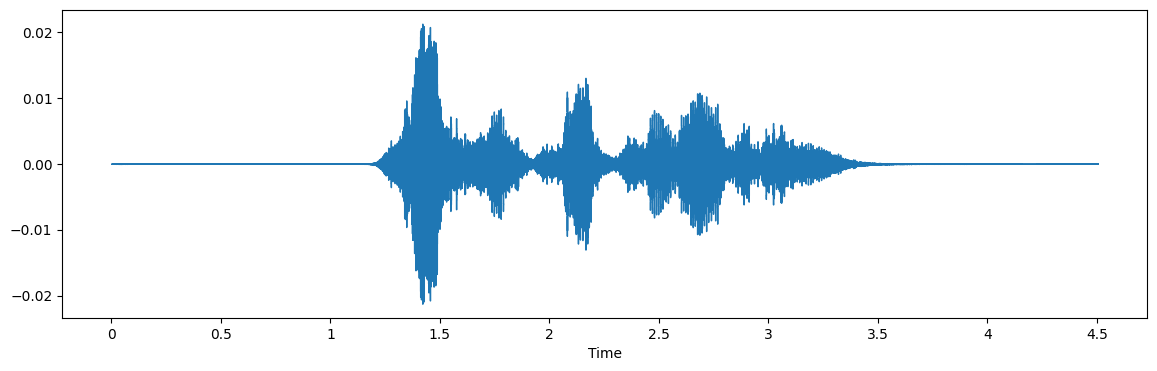

In [28]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)     #waveplot of stretched data
Audio(x, rate=sample_rate)

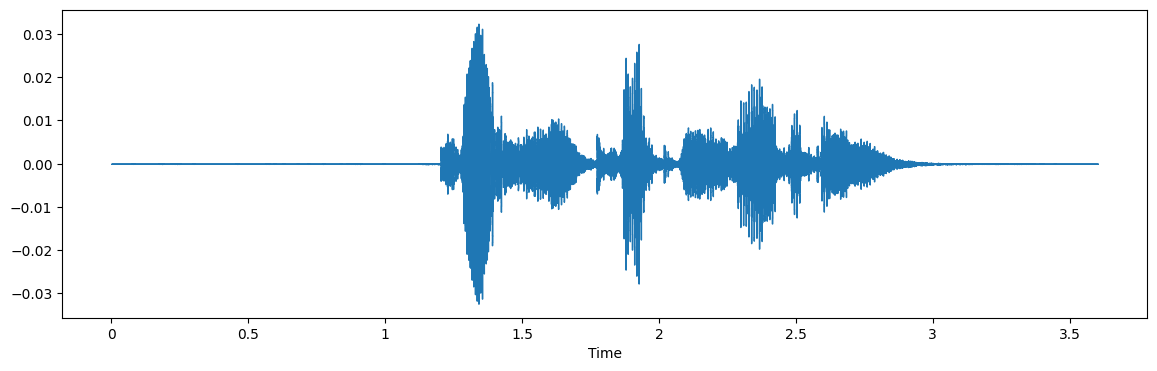

In [29]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)  #waveplot of shifted data
Audio(x, rate=sample_rate)

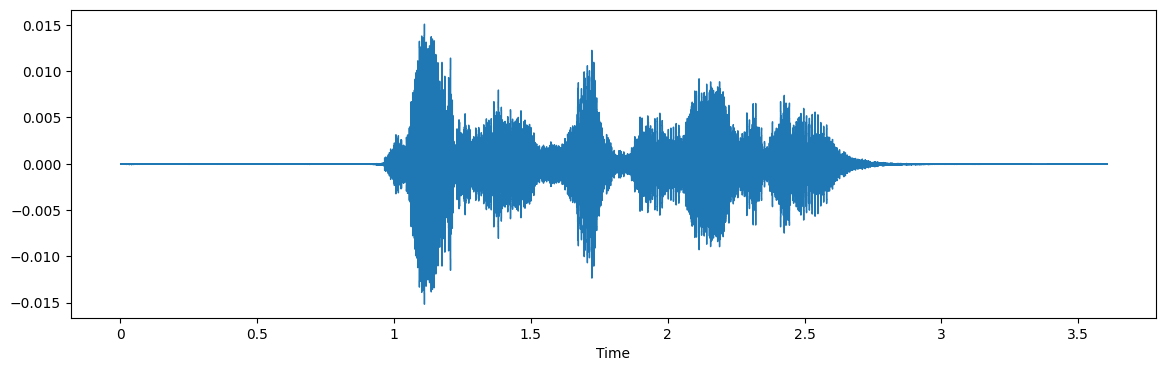

In [30]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)     #waveplot of data with scaled pitch
Audio(x, rate=sample_rate)

## EXTRACTING FEATURES

In [30]:
def extract_features(data,sample_rate):
    result = np.array([])

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = gaussian_noise(data)
    res2 = extract_features(noise_data,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with pitching)
    data_stretch_pitch = pitch(data, sample_rate)
    res3 = extract_features(data_stretch_pitch,sample_rate)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [33]:
len(X), len(Y), data_path.Path.shape

(4032, 4032, (1344,))

## IMPORTING FEATURES TO CSV FILE

In [34]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,-664.521118,105.086784,-14.334901,35.750858,-2.922972,12.071979,-12.819363,-1.900473,-16.193184,-8.165876,...,1.477452e-15,1.156841e-15,9.477966e-16,7.997308e-16,7.027081e-16,6.257438e-16,5.767997e-16,5.375133e-16,5.157657e-16,calm
1,-502.258021,40.172791,11.668841,13.202699,5.970155,1.472990,-4.053561,-6.775235,-9.631152,-6.387676,...,1.242088e-05,1.258670e-05,1.261818e-05,1.288169e-05,1.248470e-05,1.330124e-05,1.247468e-05,1.238967e-05,1.314863e-05,calm
2,-694.677429,101.071388,-12.095994,36.136307,-5.951420,11.208563,-15.341566,-2.415012,-19.104883,-2.693051,...,1.637727e-15,1.403330e-15,1.218176e-15,1.126266e-15,8.677173e-16,8.496540e-16,7.772350e-16,6.599572e-16,6.542161e-16,calm
3,-644.531677,111.879288,-12.482704,29.493940,1.852232,10.470756,-13.204048,-3.079708,-13.638717,-7.511690,...,3.559407e-14,3.213115e-14,2.959273e-14,2.764285e-14,2.614025e-14,2.500749e-14,2.415588e-14,2.357164e-14,2.320886e-14,calm
4,-466.852132,37.387810,14.690685,11.655795,6.921600,2.951682,-3.465657,-6.379575,-8.030468,-5.475748,...,3.226875e-05,3.249650e-05,3.196510e-05,3.232729e-05,3.101600e-05,3.255438e-05,3.198471e-05,3.198317e-05,3.182707e-05,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,-275.954646,17.244226,-6.014878,1.529202,-14.085451,-2.077833,-9.069314,-4.862032,-3.159249,-6.927130,...,1.318778e-03,1.228666e-03,1.250145e-03,1.276093e-03,1.338833e-03,1.353035e-03,1.291309e-03,1.296567e-03,1.253264e-03,surprise
4028,-438.700378,67.884155,-43.224350,29.731983,-45.709114,13.971882,-35.074360,0.893804,-9.130677,-5.172241,...,7.701421e-12,5.507027e-12,4.093198e-12,3.151815e-12,2.374987e-12,1.769147e-12,1.162884e-12,8.039181e-13,6.849778e-13,surprise
4029,-471.755981,72.697395,-32.784992,20.881147,-29.685863,7.488073,-27.214539,-1.403411,-16.074137,-6.003501,...,1.716271e-10,1.567891e-10,1.455264e-10,1.366425e-10,1.296519e-10,1.243072e-10,1.202508e-10,1.174646e-10,1.157354e-10,surprise
4030,-471.725226,72.689081,-32.780011,20.897380,-29.692800,7.497864,-27.209980,-1.397741,-16.082257,-6.016357,...,1.480722e-08,1.513408e-08,1.455141e-08,1.509724e-08,1.430411e-08,1.495725e-08,1.493510e-08,1.504316e-08,1.531715e-08,surprise


# Loading Features from csv File

In [52]:
raw_data = open("features.csv", 'rt')
Features = pd.read_csv(raw_data, delimiter=',')

In [53]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [37]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

# Splitting of Data

In [38]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3628, 148), (3628, 7), (1210, 148), (1210, 7))

In [39]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3628, 148), (3628, 7), (1210, 148), (1210, 7))

In [40]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3628, 148, 1), (3628, 7), (1210, 148, 1), (1210, 7))

# Creating Model


In [41]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 148, 256)          1536      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 74, 256)           327936    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 37, 256)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 37, 256)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 37, 128)           163968    
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 19, 128)          

# Execution of Model

In [42]:
#rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.000001)
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", verbose=1,
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[earlystopping])

Epoch 1/100
57/57 [==============================] - ETA: 10:09 - loss: 1.9717 - accuracy: 0.093 - ETA: 20s - loss: 1.9880 - accuracy: 0.1172  - ETA: 19s - loss: 1.9912 - accuracy: 0.126 - ETA: 20s - loss: 1.9870 - accuracy: 0.130 - ETA: 20s - loss: 1.9821 - accuracy: 0.134 - ETA: 20s - loss: 1.9775 - accuracy: 0.139 - ETA: 20s - loss: 1.9748 - accuracy: 0.143 - ETA: 19s - loss: 1.9705 - accuracy: 0.146 - ETA: 19s - loss: 1.9675 - accuracy: 0.149 - ETA: 19s - loss: 1.9641 - accuracy: 0.152 - ETA: 18s - loss: 1.9606 - accuracy: 0.154 - ETA: 18s - loss: 1.9572 - accuracy: 0.156 - ETA: 18s - loss: 1.9544 - accuracy: 0.158 - ETA: 17s - loss: 1.9514 - accuracy: 0.160 - ETA: 16s - loss: 1.9496 - accuracy: 0.161 - ETA: 16s - loss: 1.9478 - accuracy: 0.163 - ETA: 16s - loss: 1.9461 - accuracy: 0.164 - ETA: 15s - loss: 1.9442 - accuracy: 0.165 - ETA: 15s - loss: 1.9423 - accuracy: 0.167 - ETA: 15s - loss: 1.9407 - accuracy: 0.168 - ETA: 14s - loss: 1.9390 - accuracy: 0.169 - ETA: 14s - loss: 1.

# Loss and Accuracy Curve

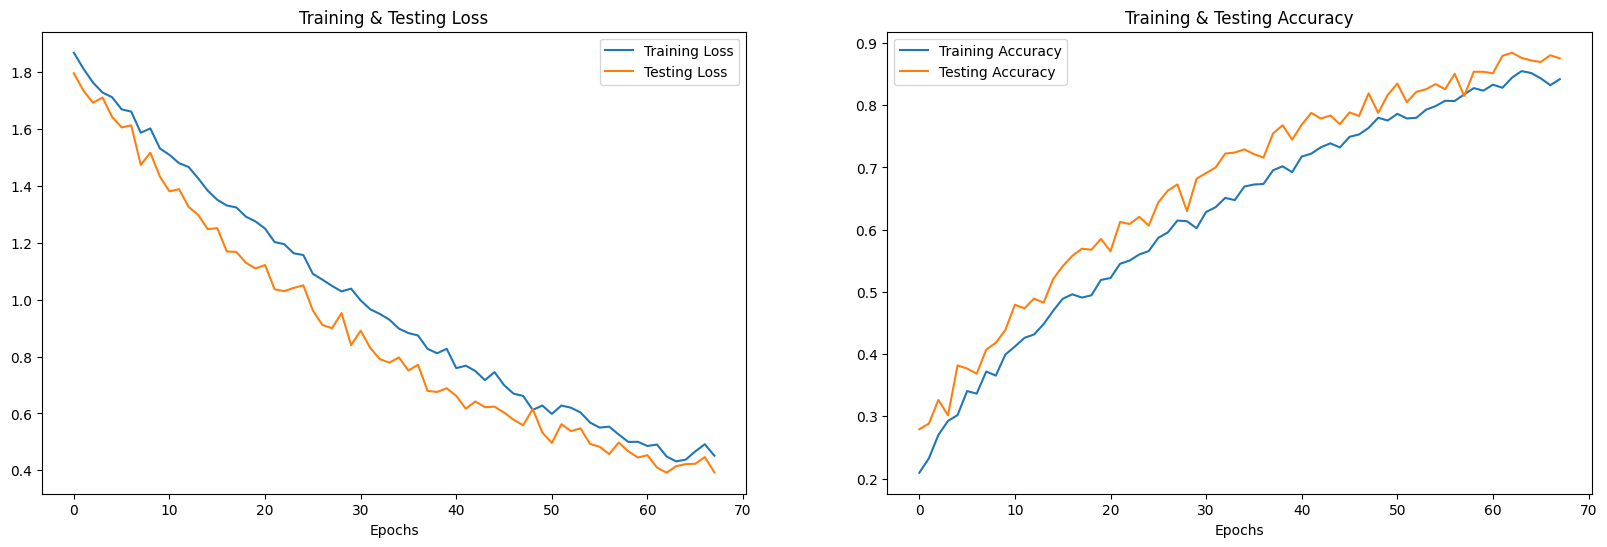

In [43]:
epochs = [i for i in range(68)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [44]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")
print("Accuracy of our model on test data : " , model.evaluate(x_train,y_train)[1]*100 , "%")

38/38 [==============================] - ETA: 1s - loss: 0.9362 - accuracy: 0.78 - ETA: 0s - loss: 0.8962 - accuracy: 0.75 - ETA: 0s - loss: 0.7838 - accuracy: 0.76 - ETA: 0s - loss: 0.7746 - accuracy: 0.75 - ETA: 0s - loss: 0.7879 - accuracy: 0.75 - ETA: 0s - loss: 0.7046 - accuracy: 0.77 - ETA: 0s - loss: 0.6161 - accuracy: 0.80 - ETA: 0s - loss: 0.5518 - accuracy: 0.83 - ETA: 0s - loss: 0.5022 - accuracy: 0.84 - ETA: 0s - loss: 0.4709 - accuracy: 0.85 - ETA: 0s - loss: 0.4388 - accuracy: 0.86 - ETA: 0s - loss: 0.4228 - accuracy: 0.87 - ETA: 0s - loss: 0.4020 - accuracy: 0.88 - 1s 22ms/step - loss: 0.3918 - accuracy: 0.8843
Accuracy of our model on test data :  88.42975497245789 %
114/114 [==============================] - ETA: 3s - loss: 0.1940 - accuracy: 0.93 - ETA: 2s - loss: 0.1994 - accuracy: 0.93 - ETA: 2s - loss: 0.1748 - accuracy: 0.95 - ETA: 2s - loss: 0.1667 - accuracy: 0.96 - ETA: 2s - loss: 0.1690 - accuracy: 0.96 - ETA: 2s - loss: 0.1742 - accuracy: 0.95 - ETA: 2s - los

In [45]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

# Comparison between Actual and Predicted 

In [46]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()
df.head(10)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,happy,fear
2,calm,calm
3,angry,angry
4,calm,fear
5,sad,sad
6,surprise,surprise
7,surprise,surprise
8,disgust,disgust
9,angry,angry


# Confusion Matrix

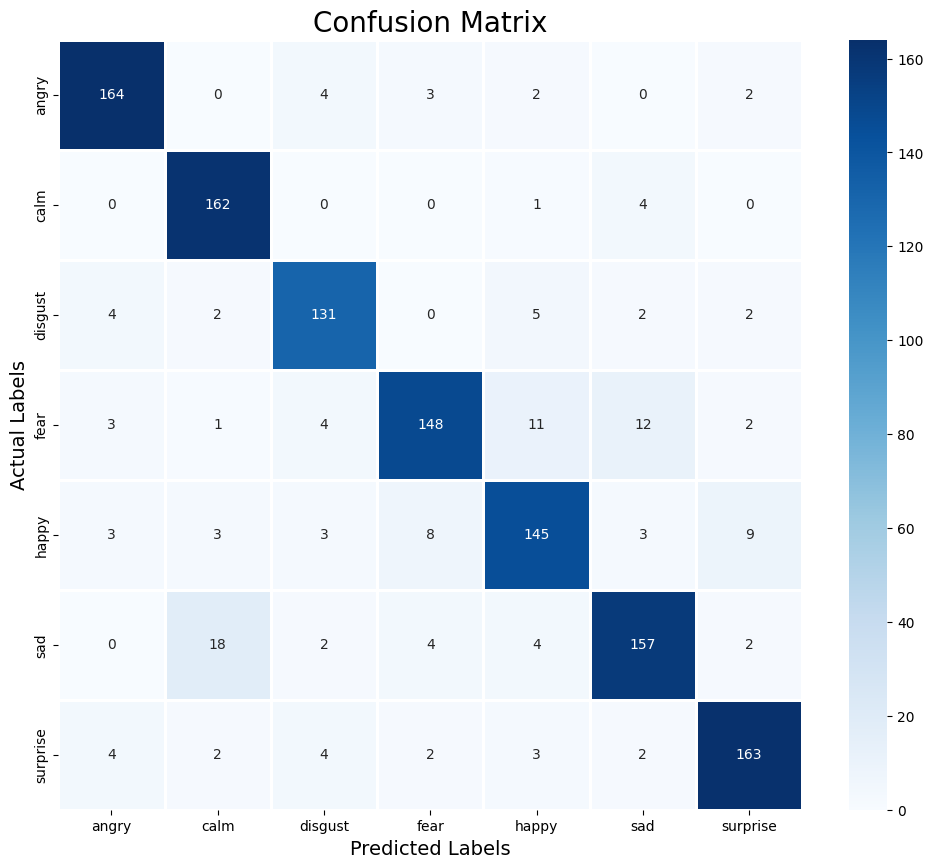

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification Matrix

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.92      0.94      0.93       175
        calm       0.86      0.97      0.91       167
     disgust       0.89      0.90      0.89       146
        fear       0.90      0.82      0.86       181
       happy       0.85      0.83      0.84       174
         sad       0.87      0.84      0.86       187
    surprise       0.91      0.91      0.91       180

    accuracy                           0.88      1210
   macro avg       0.88      0.89      0.88      1210
weighted avg       0.88      0.88      0.88      1210



# SVM Model

In [54]:
from sklearn.svm import SVC 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.1, random_state = 42)

In [127]:
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 10, 100, 1000,10000,10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.00001],
    'kernel': ['rbf']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [84]:
clf = SVC(kernel='rbf', gamma=0.0001, C=1000)
clf.fit(X_train, y_train)

SVC(C=1000, gamma=0.0001)

In [85]:
svm_predictions = clf.predict(X_test)
  
# model accuracy for X_test  
accuracy = clf.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

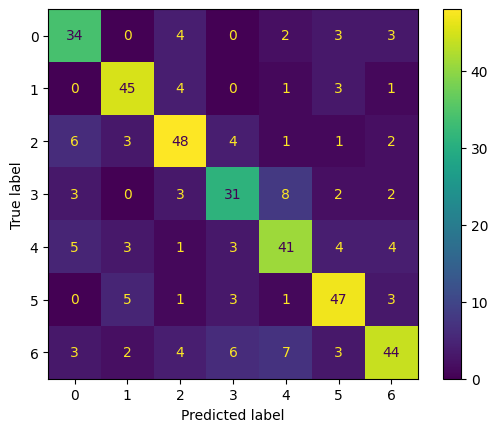

In [86]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [87]:
accuracy

0.7178217821782178

In [88]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

       angry       0.67      0.74      0.70        46
        calm       0.78      0.83      0.80        54
     disgust       0.74      0.74      0.74        65
        fear       0.66      0.63      0.65        49
       happy       0.67      0.67      0.67        61
         sad       0.75      0.78      0.76        60
    surprise       0.75      0.64      0.69        69

    accuracy                           0.72       404
   macro avg       0.71      0.72      0.72       404
weighted avg       0.72      0.72      0.72       404

